#### Jueves 8 de Mayo de 2025

## Árbol de Decisión ID3. ¿Es un perro peligroso?

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Dataset

data = {
    'Raza': ['Chihuahua', 'Pitbull', 'Labrador'],
    'Tamaño': ['Pequeño', 'Grande', 'Grande'],
    'LadraMucho': ['Sí', 'No', 'Sí'],
    'Peludo': ['Sí', 'No', 'Sí'],
    'Peligroso': ['No', 'Sí', 'No']
}

df = pd.DataFrame(data)
print("Dataset original: \n")
print(df)

Dataset original: 



,Raza,Tamaño,LadraMucho,Peludo,Peligroso
0,Chihuahua,Pequeño,Sí,Sí,No
1,Pitbull,Grande,No,No,Sí
2,Labrador,Grande,Sí,Sí,No


In [ ]:
#Codificación de variables categóricas a numéricas

le = LabelEncoder()
df_encoded = df.copy()
for columna in df.columns:
    df_encoded[columna] = le.fit_transform(df[columna])

print("\nDataset codificado: \n")
print(df_encoded)


Dataset codificado: 



,Raza,Tamaño,LadraMucho,Peludo,Peligroso
0,0,1,1,1,0
1,2,0,0,0,1
2,1,0,1,1,0


In [8]:
#Separacion de carcaterísticas (X) y (y)
X = df_encoded.drop('Peligroso', axis=1)
y = df_encoded['Peligroso']

In [9]:
#Entrenamiento del árbol de decisión
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    random_state=42
)

modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())

Profundidad real del árbol: 1
Número de hojas: 2


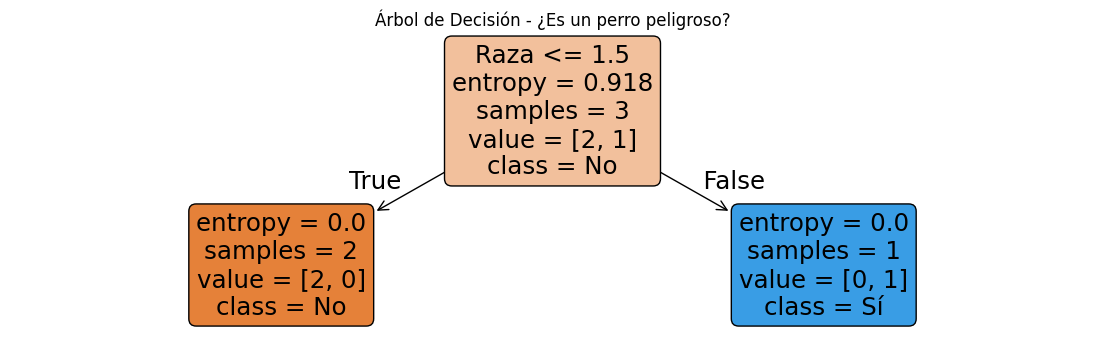

In [10]:
#Visualización del Árbol de Decisión
plt.figure(figsize=(14, 4))
plot_tree(
    modelo, 
    feature_names = X.columns,
    class_names = df['Peligroso'].unique(),
    filled = True,
    rounded = True
)
plt.title('Árbol de Decisión - ¿Es un perro peligroso?')
plt.show()

In [12]:
# Predicciones

# Raza: 0=Chihuahua 1: Labrador 2: Pitbull
# Tamaño: 1=Pequeño 0:Grande
# LadraMucho: 1=Sí 0=No
# Peludo: 1=Sí 0=No

print("PREDICCIÓN - ¿ES UN PERRO PELIGROSO?\n")

nuevo_perro = {
    'Raza': 2,
    'Tamaño': 0,
    'LadraMucho': 0,
    'Peludo': 1
}

nuevo_df = pd.DataFrame([nuevo_perro])

for atributo, valor in nuevo_perro.items():
    print(f"{atributo}: {valor}")

prediccion = modelo.predict(nuevo_df)

print("\nPredicción para el nuevo perro:")
if prediccion[0] == 1:
    print("\nEl perro es peligroso")
else:
    print("\nEl perro no es peligroso")

PREDICCIÓN - ¿ES UN PERRO PELIGROSO?

Raza: 2
Tamaño: 0
LadraMucho: 0
Peludo: 1

Predicción para el nuevo perro:

El perro es peligroso


In [14]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in zip(X.columns, importancias):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Raza -> 1.0
Tamaño -> 0.0
LadraMucho -> 0.0
Peludo -> 0.0


####  ¿Cuál es la entropía del nodo raíz? , ¿Cómo afecta el atributo "Peludo" al árbol?

In [15]:
# La entropía del nodo raíz es de: 0.918

# En este pequeño conjunto de datos, el atributo "Peludo" tiene un impacto directo sobre si un perro 
# es peligroso o no. Cuando el perro es peludo, no es peligroso (como el Chihuahua y el Labrador). 
# En cambio, el único perro que no es peludo (el Pitbull), sí es peligroso.